# Results


In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.insert(0, '..')
from utils import plot_stroke
from utils.constants import Global
from utils.dataset import HandwritingDataset
from utils.data_utils import data_denormalization
from models.models import HandWritingPredictionNet, HandWritingSynthesisNet
from generate import generate_unconditional_seq, generate_conditional_sequence

../utils/__init__.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/swechha/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/swechha/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/swechha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/swechha/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/swechha/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/swe

### Unconditional generation:

Generating sequence....


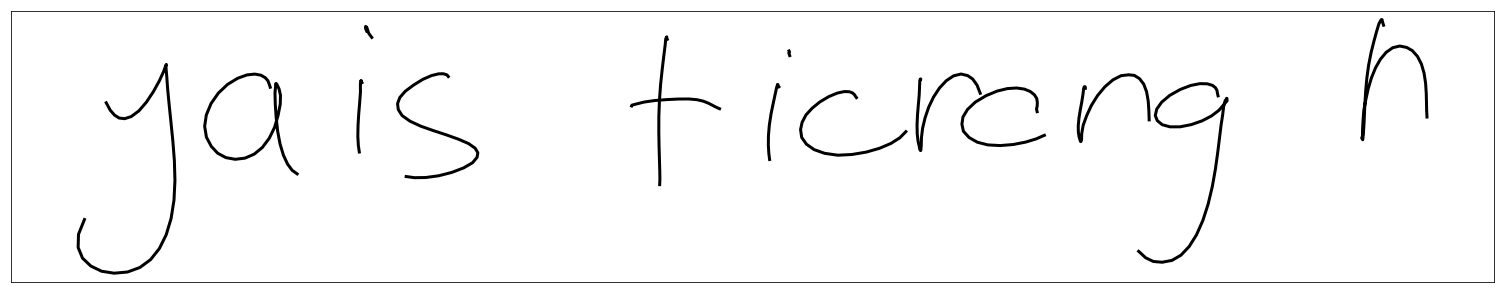

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# fix random seed
seed = 222
torch.manual_seed(seed)
np.random.seed(seed)
model_path = '../saved_models/best_model_prediction.pt'
data_path = '../data/'

train_dataset = HandwritingDataset(data_path, split='train', text_req=True)

seq_len = 400
#prediction
gen_seq = generate_unconditional_seq(model_path, seq_len, device, bias=10.)

# denormalize the generated offsets using train set mean and std
gen_seq = data_denormalization(Global.train_mean, Global.train_std, gen_seq)

# plot the sequence
plot_stroke(gen_seq[0])

### Conditional generation:

Generating sequence....
EOS: True
seq_len: 506
Input seq:  welcome to lyrebird  
(1, 506, 21)


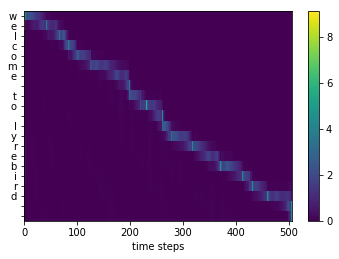

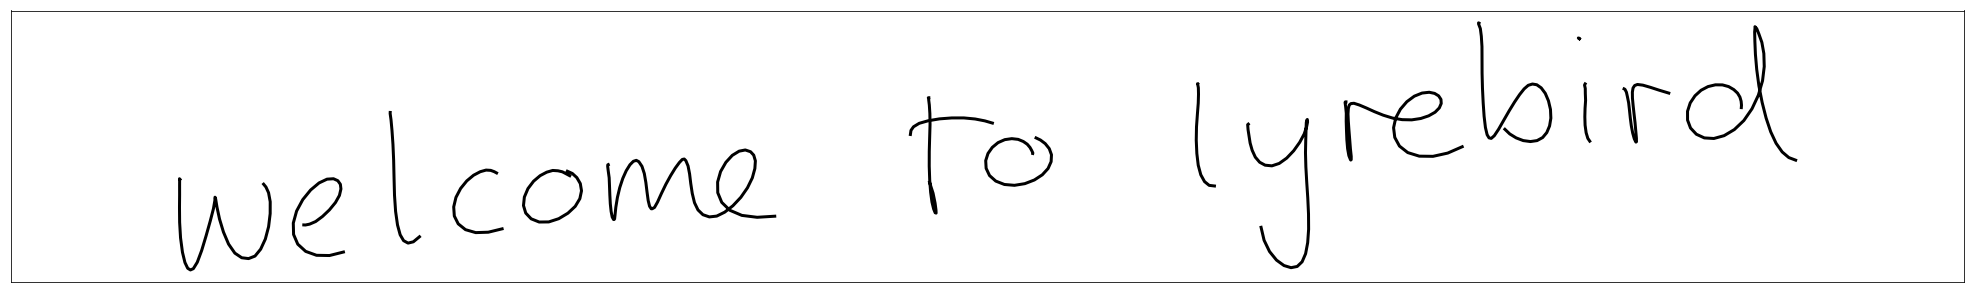

In [7]:
model_path = '../saved_models/best_model_synthesis.pt'
text = "welcome to lyrebird"
gen_seq = generate_conditional_sequence(model_path, text, device, 
                                        train_dataset.char_to_id, train_dataset.idx_to_char, bias=10.)

# denormalize the generated offsets using train set mean and std
gen_seq = data_denormalization(Global.train_mean, Global.train_std, gen_seq)

# plot the sequence
plot_stroke(gen_seq[0])

Generating sequence....
EOS: True
seq_len: 225
Input seq:  welcome to  
(1, 225, 12)


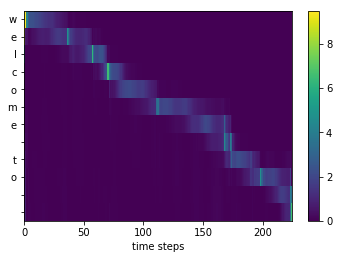

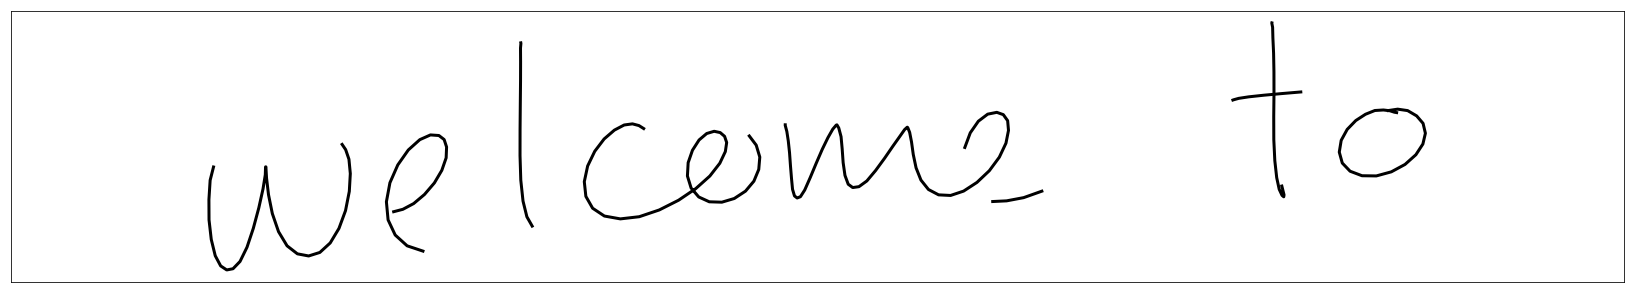

In [10]:
text = "welcome to"
gen_seq = generate_conditional_sequence(model_path, text, device, 
                                        train_dataset.char_to_id, train_dataset.idx_to_char, bias=10.)

# denormalize the generated offsets using train set mean and std
gen_seq = data_denormalization(Global.train_mean, Global.train_std, gen_seq)

# plot the sequence
plot_stroke(gen_seq[0])

Generating sequence....
EOS: True
seq_len: 194
Input seq:  welcome  
(1, 194, 9)


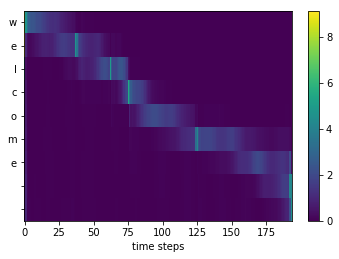

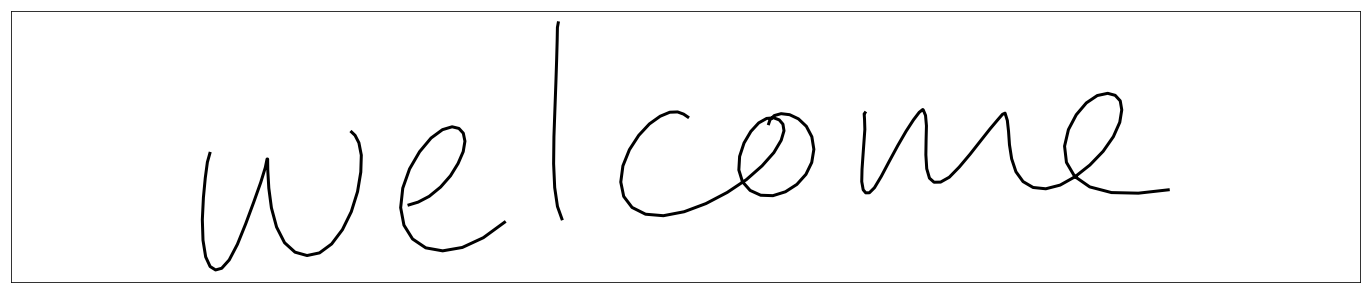

In [11]:
text = "welcome"
gen_seq = generate_conditional_sequence(model_path, text, device, 
                                        train_dataset.char_to_id, train_dataset.idx_to_char, bias=10.)

# denormalize the generated offsets using train set mean and std
gen_seq = data_denormalization(Global.train_mean, Global.train_std, gen_seq)

# plot the sequence
plot_stroke(gen_seq[0])

Generating sequence....
EOS: True
seq_len: 775
Input seq:  python handwriting synthesis  
(1, 775, 30)


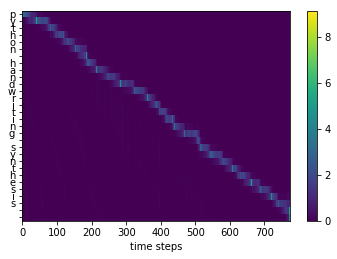

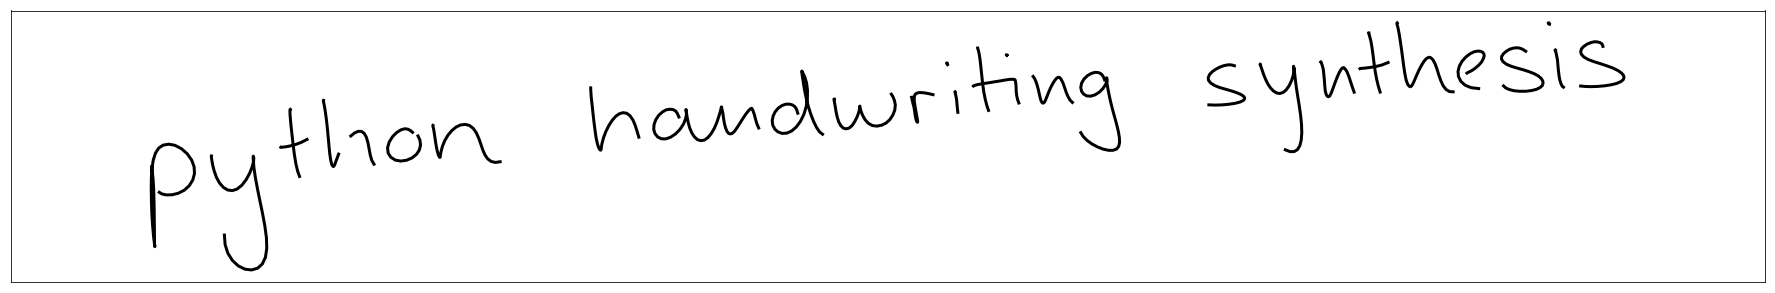

In [17]:
text = "python handwriting synthesis"
gen_seq = generate_conditional_sequence(model_path, text, device, 
                                        train_dataset.char_to_id, train_dataset.idx_to_char, bias=8.)

# denormalize the generated offsets using train set mean and std
gen_seq = data_denormalization(Global.train_mean, Global.train_std, gen_seq)

# plot the sequence
plot_stroke(gen_seq[0])